In [1]:
# import the Seaborn package for good data visualization.

%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 폰트 경로 설정
font_path = './NanumGothic.ttf'

# 폰트 등록
font_manager.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

import pandas as pd

In [10]:
# append the song data from nigerian-songs.csv.
# Load up a dataframe with some data about the songs. 

# df = pd.read_csv("./도로교통공단_시군구별 월별 교통사고 통계_20221231.csv")
# df = pd.read_csv("./한국환경공단_도로 재비산먼지 측정 정보_20240331.csv")
df = pd.read_csv("서울교통공사_지하철혼잡도정보_20230331.csv")
df.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,8.2,18.9,19.8,35.7,...,19.4,18.6,18.4,15.0,17.4,18.9,15.2,13.1,7.3,1.1
1,2,평일,1,150,서울역,하선,11.1,10.7,15.7,23.5,...,39.6,37.0,42.5,36.5,41.0,29.1,18.4,16.2,5.5,0.0
2,3,평일,1,151,시청,상선,8.0,13.3,16.9,29.2,...,23.3,22.5,23.1,18.5,21.6,21.6,19.5,14.4,7.7,1.6
3,4,평일,1,151,시청,하선,9.1,9.9,17.7,22.7,...,34.1,33.6,39.1,30.2,35.1,24.5,15.8,14.1,4.1,0.4
4,5,평일,1,152,종각,상선,7.8,11.7,10.6,19.5,...,31.8,29.5,32.5,24.8,28.2,28.4,26.7,17.0,8.6,1.5


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1641 non-null   int64  
 1   요일구분    1641 non-null   object 
 2   호선      1641 non-null   int64  
 3   역번호     1641 non-null   int64  
 4   출발역     1641 non-null   object 
 5   상하구분    1641 non-null   object 
 6   5시30분   1641 non-null   float64
 7   6시00분   1641 non-null   float64
 8   6시30분   1641 non-null   float64
 9   7시00분   1641 non-null   float64
 10  7시30분   1641 non-null   float64
 11  8시00분   1641 non-null   float64
 12  8시30분   1641 non-null   float64
 13  9시00분   1641 non-null   float64
 14  9시30분   1641 non-null   float64
 15  10시00분  1641 non-null   float64
 16  10시30분  1641 non-null   float64
 17  11시00분  1641 non-null   float64
 18  11시30분  1641 non-null   float64
 19  12시00분  1641 non-null   float64
 20  12시30분  1641 non-null   float64
 21  13시00분  1641 non-null   float64
 22  

In [12]:
df.isnull().sum()


연번        0
요일구분      0
호선        0
역번호       0
출발역       0
상하구분      0
5시30분     0
6시00분     0
6시30분     0
7시00분     0
7시30분     0
8시00분     0
8시30분     0
9시00분     0
9시30분     0
10시00분    0
10시30분    0
11시00분    0
11시30분    0
12시00분    0
12시30분    0
13시00분    0
13시30분    0
14시00분    0
14시30분    0
15시00분    0
15시30분    0
16시00분    0
16시30분    0
17시00분    0
17시30분    0
18시00분    0
18시30분    0
19시00분    0
19시30분    0
20시00분    0
20시30분    0
21시00분    0
21시30분    0
22시00분    0
22시30분    0
23시00분    0
23시30분    0
00시00분    0
00시30분    0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value



In [13]:
df.describe()


,연번,호선,역번호,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
count,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,...,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,821.000000,4.588665,1604.281536,15.572212,15.563620,14.894576,19.907434,26.133151,33.445582,31.203961,...,26.452773,26.791469,27.160878,26.210055,27.324741,24.155637,20.959415,15.426386,3.747349,1.800914
std,473.860211,2.007205,1174.730140,14.277603,11.093603,12.590391,19.867906,26.441769,30.604151,24.807199,...,14.753382,15.713067,15.889243,16.418196,17.418768,15.324677,14.160868,11.581066,5.844918,3.592742
min,1.000000,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,411.000000,3.000000,316.000000,7.000000,8.300000,7.200000,7.800000,9.800000,13.000000,15.100000,...,15.700000,15.300000,14.800000,13.500000,14.300000,12.400000,9.800000,6.900000,0.000000,0.000000
50%,821.000000,5.000000,2526.000000,11.200000,12.900000,10.900000,12.500000,15.500000,22.200000,23.400000,...,24.700000,24.400000,25.600000,24.200000,24.600000,21.700000,18.200000,12.800000,0.000000,0.000000
75%,1231.000000,6.000000,2641.000000,20.100000,19.800000,17.900000,23.800000,32.300000,42.300000,39.600000,...,34.900000,36.100000,37.500000,35.700000,37.100000,33.400000,29.400000,21.200000,6.200000,2.100000
max,1641.000000,8.000000,2828.000000,116.300000,74.000000,81.300000,123.900000,146.000000,150.100000,145.100000,...,83.400000,81.000000,88.000000,104.200000,101.000000,77.600000,82.700000,79.900000,40.300000,20.400000


Text(0.5, 1.0, 'Top genres')

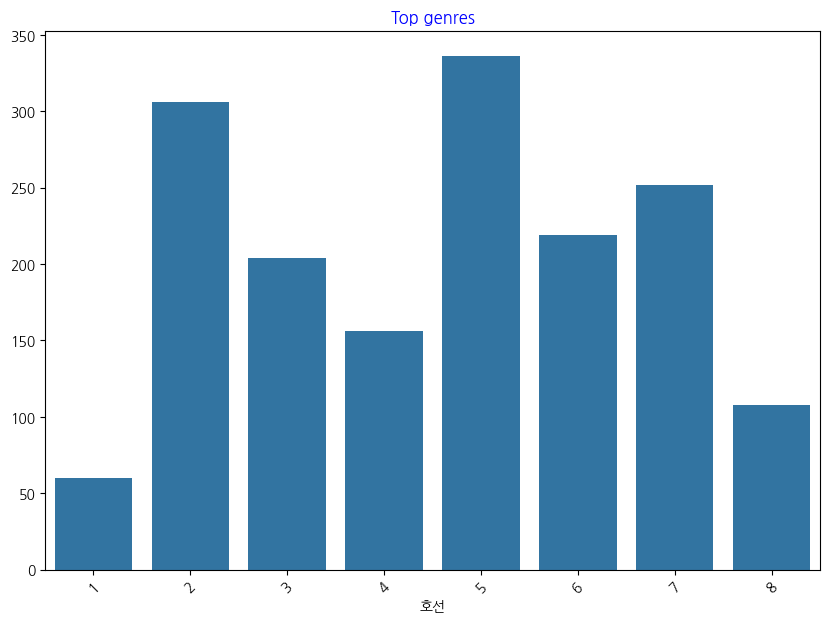

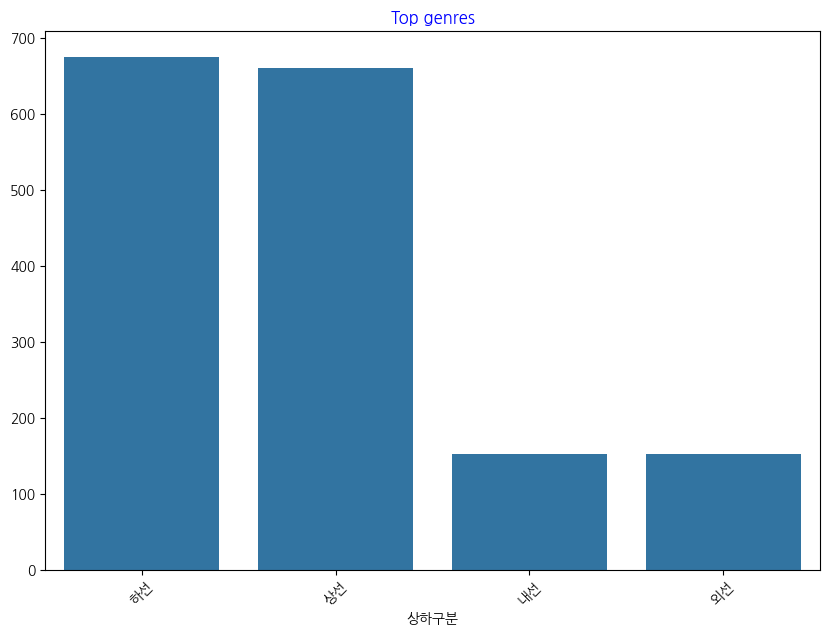

In [19]:
# use a barplot to find out the most popular genres

import seaborn as sns

# top = df['시도'].value_counts()
top = df['호선'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:8].index,y=top[:8].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

# top = df['시도'].value_counts()
top = df['상하구분'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:7].index,y=top[:7].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

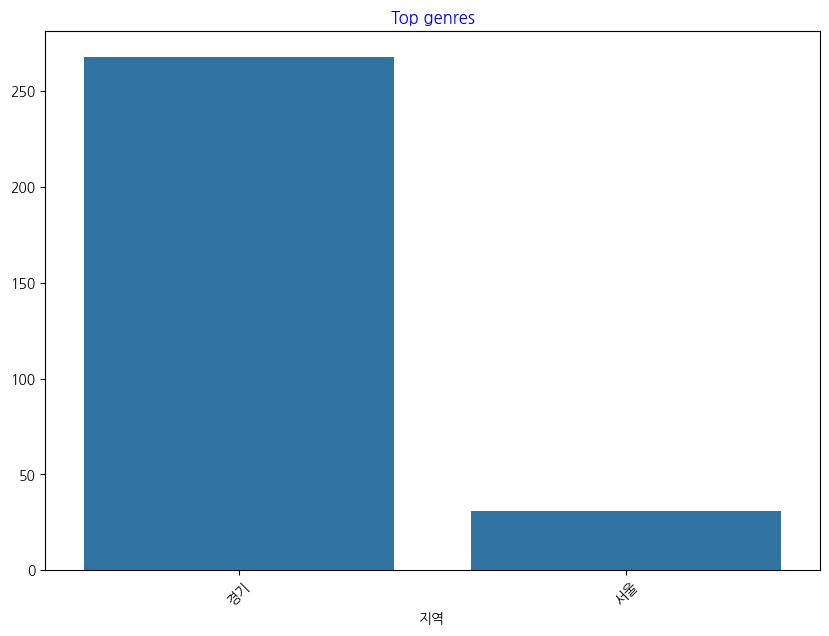

In [8]:
# df = df[(df['시도'] == '서울') | (df['시도'] == '경기') | (df['시도'] == '경북')]
# df = df[(df['사고건수'] > 0)]
# top = df['시도'].value_counts()

# df = df[(df['지역'] == '서울') | (df['지역'] == '경기') | (df['지역'] == '경북')]
# df = df[(df['재비산먼지 평균농도'] > 0)]
# top = df['지역'].value_counts()

# df = df[(df['지역'] == '서울') | (df['지역'] == '경기') | (df['지역'] == '경북')]
# df = df[(df['재비산먼지 평균농도'] > 0)]
# top = df['지역'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

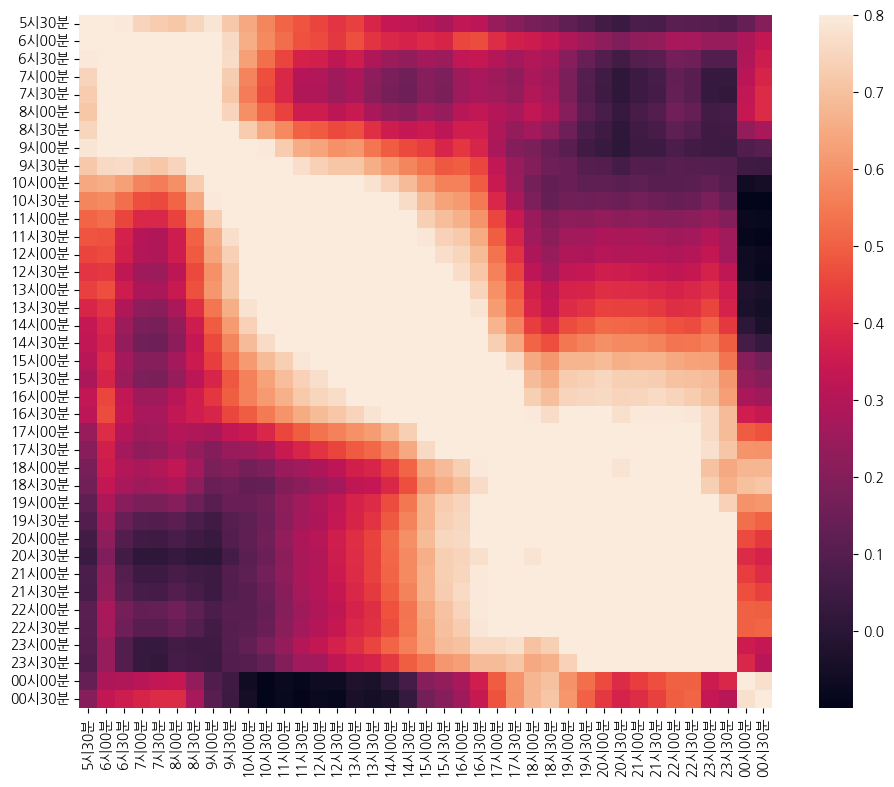

In [21]:
# do a quick test to see if the data correlates in any particularly strong way

df_modified = df.iloc[:, 6:]
corrmat = df_modified.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  f.tight_layout()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1766: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAEN

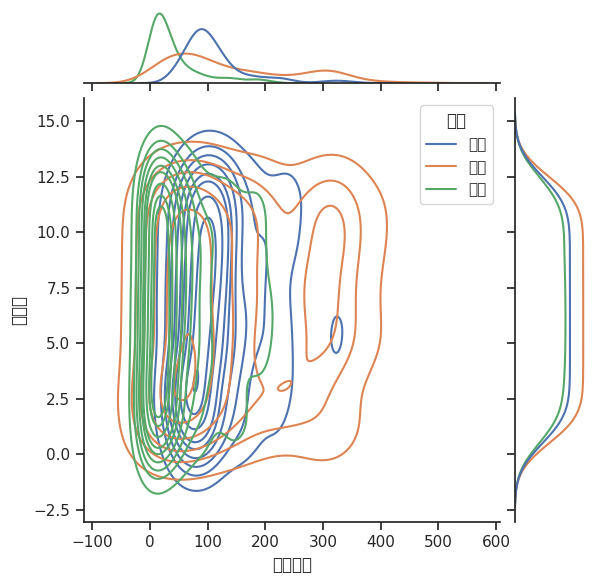

In [ ]:

# examine our top three genres data distribution for popularity and danceability along a given x and y axis

import seaborn as sns

sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data = df,
    x="사고건수", y="발생월", hue="시도",
    kind="kde",
)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/h

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph

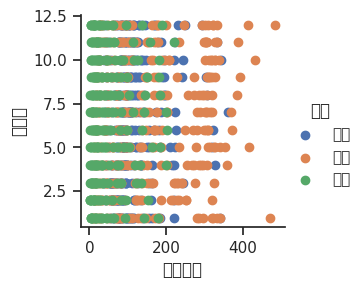

In [ ]:
sns.FacetGrid(df, hue="시도") \
   .map(plt.scatter, "사고건수", "발생월") \
   .add_legend()

## 여기서부터 cluster2

<Axes: xlabel='부상신고자수'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyp

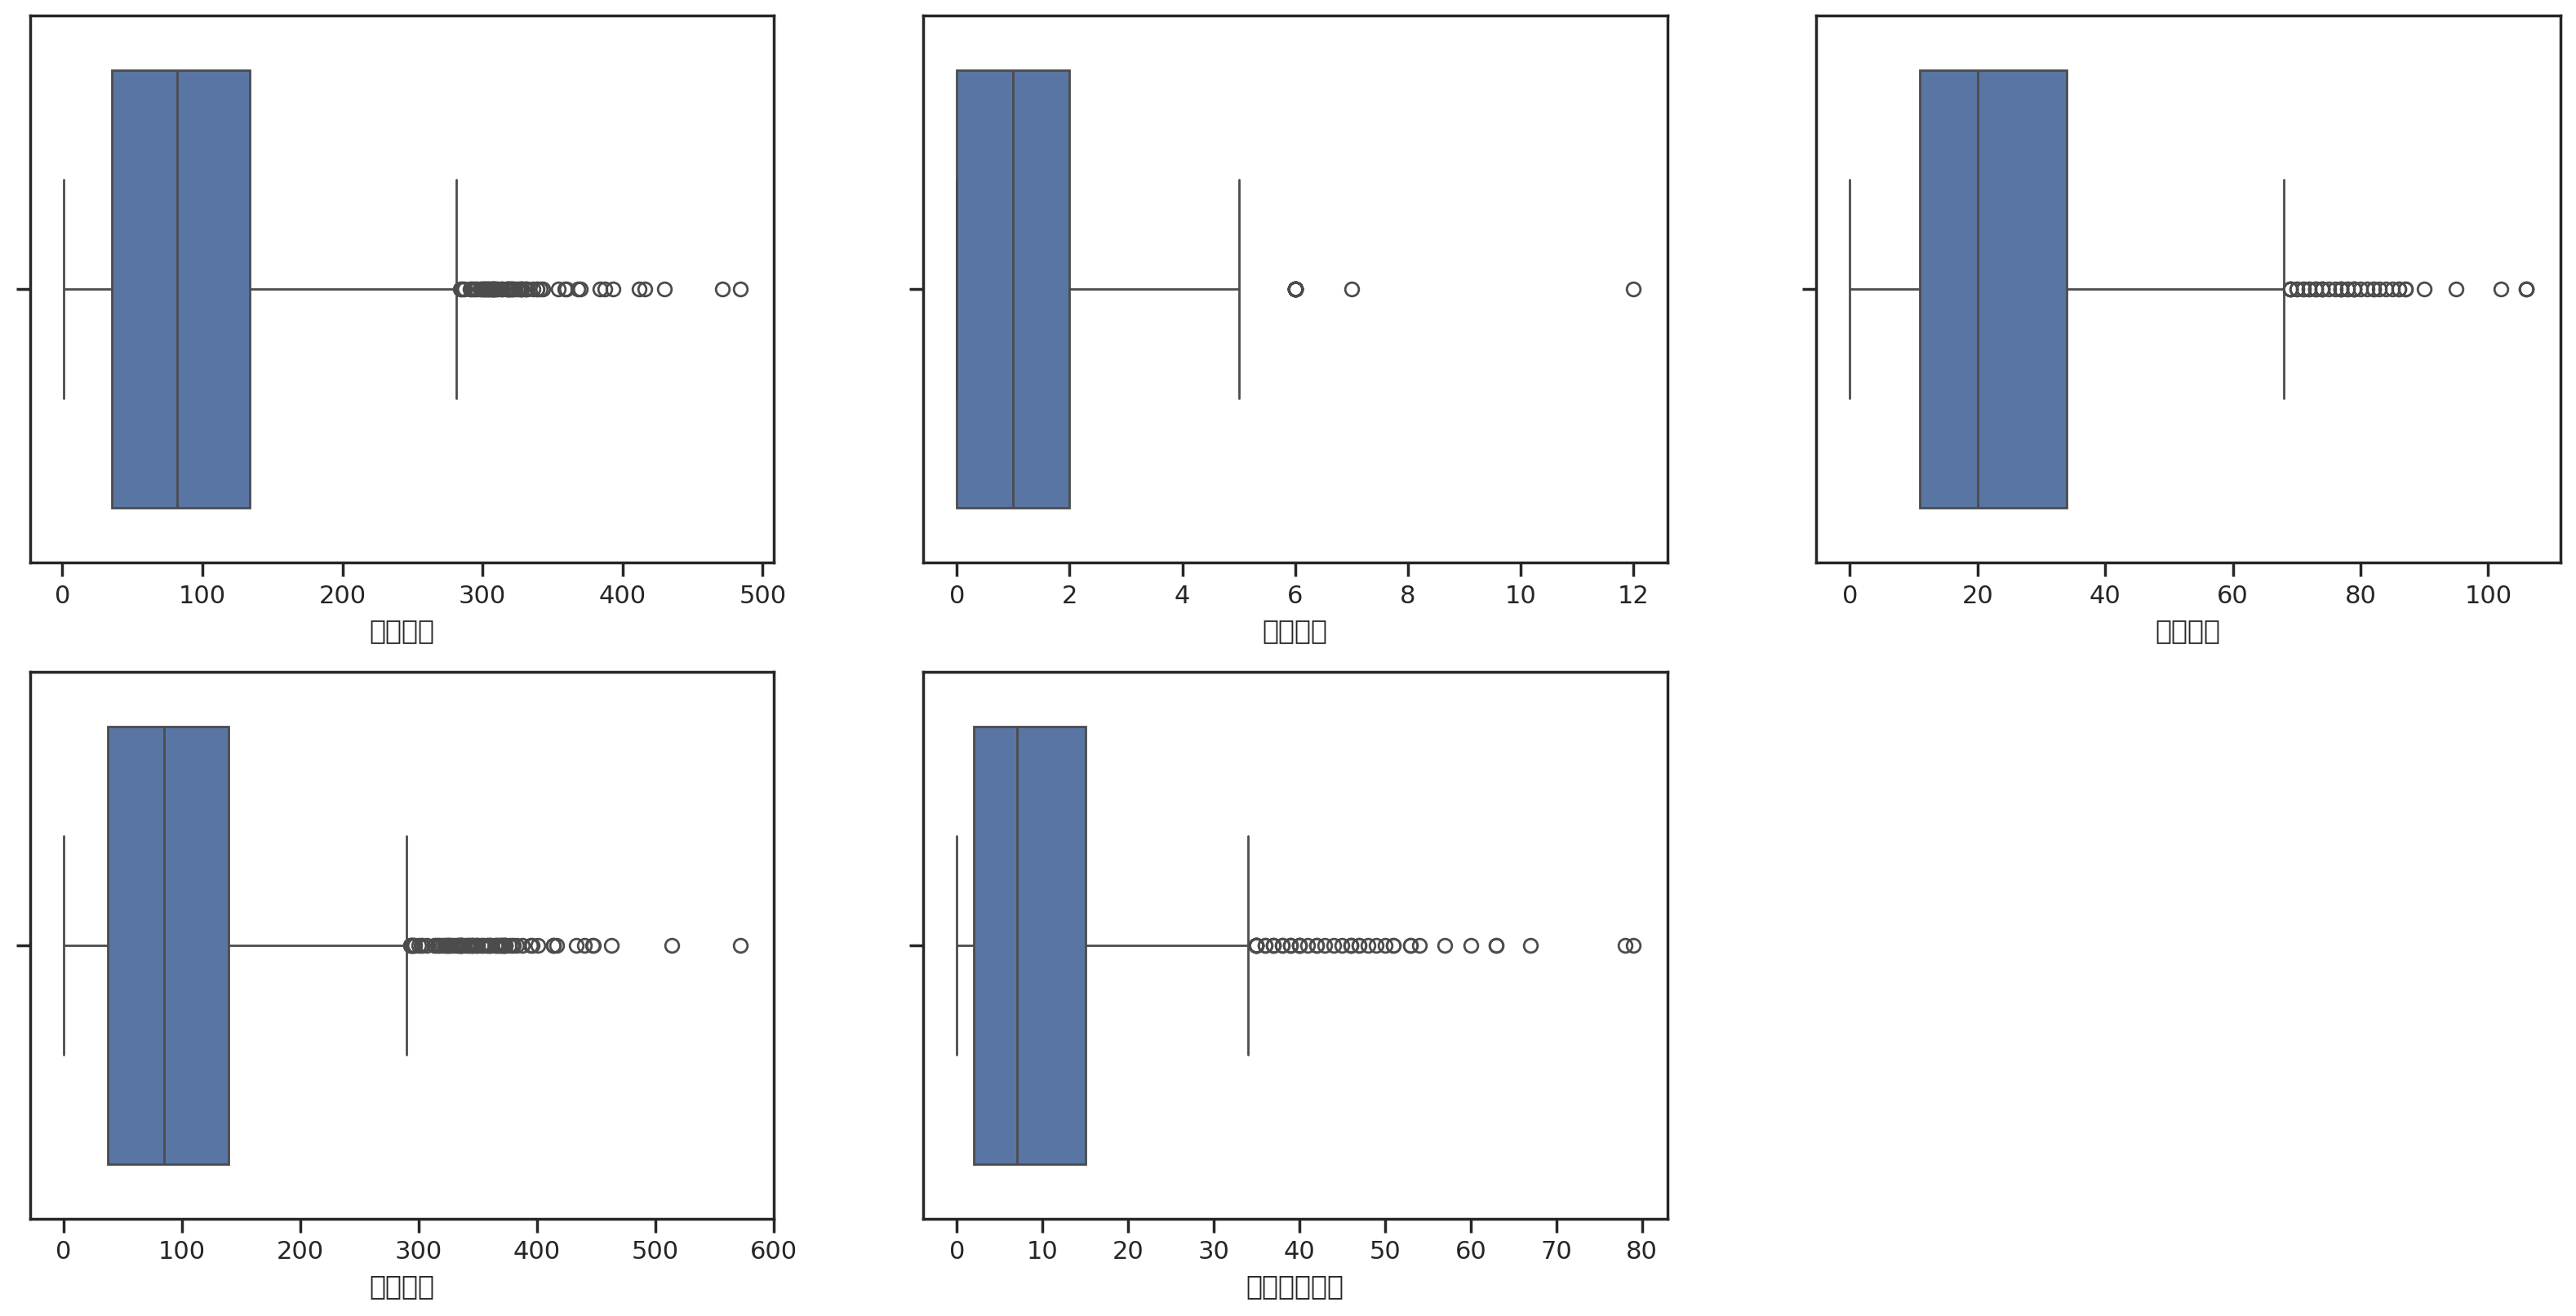

In [ ]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = '사고건수', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = '사망자수', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = '중상자수', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = '경상자수', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = '부상신고자수', data = df)

In [ ]:
# choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data:

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('시도','사고건수','발생월','사망자수','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)

KeyError: "['loudness', 'energy'] not in index"